# AP HW3

## Linear Factor Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
industry_portfolios = \
    pd\
    .read_csv("/Users/lu/Desktop/Industry_Portfolios.csv")# 包含各行业的收益数据

risk_factor =\
    pd\
    .read_csv("/Users/lu/Desktop/Risk_Factors.csv")

In [3]:
#risk_factor
# print(industry_portfolios.columns)
# print(risk_factor.columns)

In [4]:
#risk_factor["Rf"].to_frame()

In [5]:
data = pd.merge(industry_portfolios, risk_factor, on='Date')
# data

## <span style="color:red">计算各行业的超额收益</span>
> 通过将各行业的收益减去无风险利率 Rf，得到超额收益 Ri - Rf，便于之后与市场超额收益进行对比。

### Fama-French 3-Factor Model:

$ \tilde{R}_i - R_f = \alpha_i + \beta_i (\tilde{R}_m - R_f)  + \gamma_i(\tilde{R}_s - \tilde{R}_b) + \delta_i(\tilde{R}_h - \tilde{R}_l) + \tilde{\epsilon}_i $

In [6]:
industry_columns = ['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth', 'Utils', 'Other']

for industry in industry_columns:
    data[industry] = data[industry] - data['Rf']

data# excess return

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Rf,Rm-Rf,SMB,HML
0,200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81,0.07,2.15,2.67,1.55
1,200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10,0.06,1.40,-1.17,0.45
2,200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72,0.09,-1.32,1.84,0.07
3,200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84,0.08,-1.83,-2.59,-1.67
4,200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80,0.06,1.17,-0.10,-0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,0.00,-2.69,0.29,-2.46
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,0.00,3.76,2.85,-1.59
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,0.00,4.17,-1.56,1.31
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74,0.00,3.12,1.34,-0.33


## <span style="color:red"> Fama-French三因子模型的回归分析</span>
> 对每个行业组合进行Fama-French三因子模型回归，得到每个行业的alpha和因子加载系数。

### Create A Table

In [7]:
# 创建回归模型的自变量矩阵 X，其中包含了常数项和三因子
X = sm.add_constant(data[["Rm-Rf",'SMB', 'HML']])
factor = []

for industry in industry_columns:
    y = data[industry]
    model = sm.OLS(y, X).fit()# 使用普通最小二乘法（OLS）对因变量 y 和自变量矩阵 X 进行回归分析。
    # 将当前行业的回归结果存储到 factor 列表中
    factor.append({
        "Industry": industry,# 记录行业名称
        "Fama-French 3-factor alpha": model.params["const"],# 提取回归模型的截距项，即Alpha值。Alpha表示行业组合的异常收益，不受市场和其他因子的解释。
        "Market risk": model.params["Rm-Rf"], # 提取市场因子 Rm-Rf 的系数（即Beta值），表示行业组合对市场因子的敏感度。
        "SMB Loading": model.params['SMB'],# 提取规模因子 SMB 的系数，表示行业组合对小市值减大市值因子的敏感度。
        'HML Loading': model.params['HML'],# 提取价值因子 HML 的系数，表示行业组合对高账面市值减低账面市值因子的敏感度。
    })

df = pd.DataFrame(factor)# 包含所有行业组合回归结果的数据框
df

,Industry,Fama-French 3-factor alpha,Market risk,SMB Loading,HML Loading
0,NoDur,0.386704,0.712134,-0.229102,-0.023342
1,Durbl,-0.474342,1.447452,0.670878,0.240949
2,Manuf,0.153285,1.142282,0.087388,0.027727
3,Enrgy,0.523007,1.028354,-0.259360,-0.008158
4,HiTec,-0.065979,1.152803,0.335674,-0.556947
5,Telcm,0.200724,0.924137,-0.080299,-0.019063
6,Shops,0.255941,0.770227,0.280191,-0.039080
7,Hlth,0.257472,0.751976,-0.212655,-0.143765
8,Utils,0.474411,0.631827,-0.387961,-0.016881
9,Other,-0.404412,1.123473,-0.061676,0.547325


## <span style="color:red"> CAPM模型的回归分析</span>
###
> 对每个行业组合进行CAPM回归，得到CAPM alpha和市场风险系数。

In [8]:
X = sm.add_constant(data[["Rm-Rf"]])# X 仅包含常数项和市场超额收益 Rm-Rf
factor = []

for industry in industry_columns:
    y = data[industry]
    model = sm.OLS(y, X).fit()  # OLS 
    factor.append({
        "Industry": industry,
        "CAPM": model.params["const"],#  表示CAPM模型中的alpha值（即异常收益）
        "Market risk": model.params["Rm-Rf"], # beta_i 表示CAPM模型的beta值
    })
    
# df1用于计算风险调整收益指标
df1 = pd.DataFrame(factor)
df1

,Industry,CAPM,Market risk
0,NoDur,0.369717,0.653744
1,Durbl,-0.417903,1.649374
2,Manuf,0.160494,1.167929
3,Enrgy,0.504485,0.965527
4,HiTec,-0.064024,1.132387
5,Telcm,0.194348,0.901721
6,Shops,0.274093,0.829515
7,Hlth,0.236968,0.675890
8,Utils,0.446523,0.537009
9,Other,-0.387508,1.206992


## <span style="color:red">计算风险调整收益指标</span>

#### Calculate:
> 1. Sharpe ratio单位总风险的收益   ----- 该比率用于衡量组合的风险调整后收益
> 2. Sortino ratio (using risk-free rate as target)Sortino比率是对Sharpe比率的改进，专注于下行风险  ----- 该比率更关注负面风险的影响。 
> 3. Treynor ratio (using CAPM β):Treynor比率表示单位市场风险的收益 ----- 适合评估组合的市场风险回报
> 4. Jensen's α: Jensen's Alpha是对CAPM模型的检验，表示实际收益与预期收益之间的差异 ----- 用于评估组合的超额收益。
> 5. Fama–French three-factor α:Fama-French三因子Alpha表示在Fama-French三因子模型中未解释的部分超额收益 ------ 用于评估组合的异常表现

Sharpe Ratio: $ S_i = \frac{E(\tilde{R}_i - R_f)}{\sqrt{Var(\tilde{R}_i - R_f)}} $

In [9]:
# SHarpe ratio
res = pd.DataFrame()
S_i = data[industry_columns].mean() / data[industry_columns].std()
res["Sharpe ratio"] = S_i.values

Sortino Ratio: $ St_i = \frac{E(\tilde{R}_i - \tilde{R}_t)}{\sqrt{SV(\tilde{R}_i; \tilde{R}_t)}}$

In [10]:
# Sortino ratio
St_i = data[industry_columns].mean() / np.sqrt((data[industry_columns].apply(lambda x: np.where(x < 0, x ** 2, 0).mean())))
res["Sortino ratio"] = St_i.values

Treynor Ratio: $ T_i = \frac{E(\tilde{R}_i - R_f)}{\beta_i}$

In [11]:
# Treynor ratio
T_i = data[industry_columns].mean() / df1["Market risk"].values
res["Treynor ratio"] = T_i.values

Jensen's α : $ \alpha_i = E(\tilde{R}_i - R_f) - \beta_i E(\tilde{R}_m - R_f) $

In [12]:
# Jensen's α
J_alpha = data[industry_columns].mean() - df1["Market risk"].values * data["Rm-Rf"].mean()
res["Jensen's α"] = J_alpha.values
# res

In [13]:
# Fama-French 3-factor
res["Fama-French 3-factor alpha"] = df["Fama-French 3-factor alpha"]
res.index = industry_columns
res

,Sharpe ratio,Sortino ratio,Treynor ratio,Jensen's α,Fama-French 3-factor alpha
NoDur,0.231099,0.350804,1.186372,0.369717,0.386704
Durbl,0.072356,0.111967,0.367463,-0.417903,-0.474342
Manuf,0.166616,0.241260,0.758251,0.160494,0.153285
Enrgy,0.181708,0.273612,1.143330,0.504485,0.523007
HiTec,0.118552,0.170620,0.564295,-0.064024,-0.065979
Telcm,0.169064,0.244940,0.836363,0.194348,0.200724
Shops,0.191753,0.293032,0.951258,0.274093,0.255941
Hlth,0.172529,0.270294,0.971435,0.236968,0.257472
Utils,0.210948,0.290044,1.452334,0.446523,0.474411
Other,0.064693,0.087351,0.299781,-0.387508,-0.404412


## <span style="color:red">绘制风险调整收益指标</span>

<Figure size 1000x600 with 0 Axes>

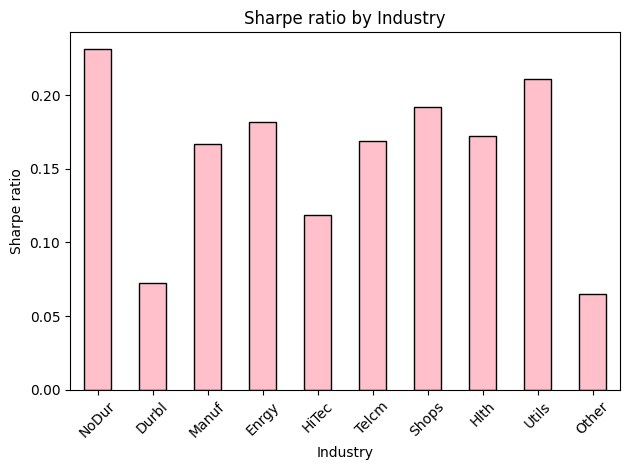

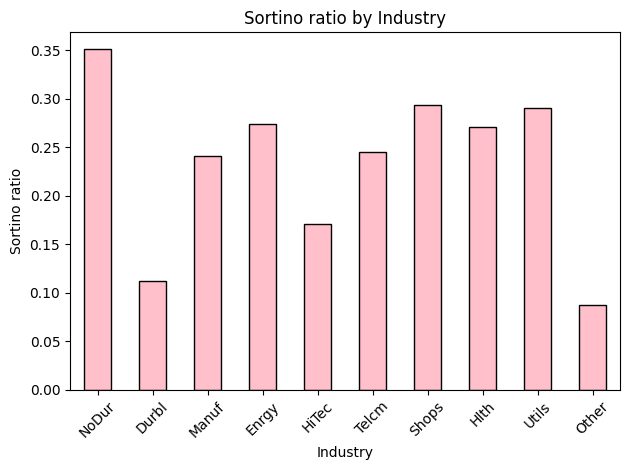

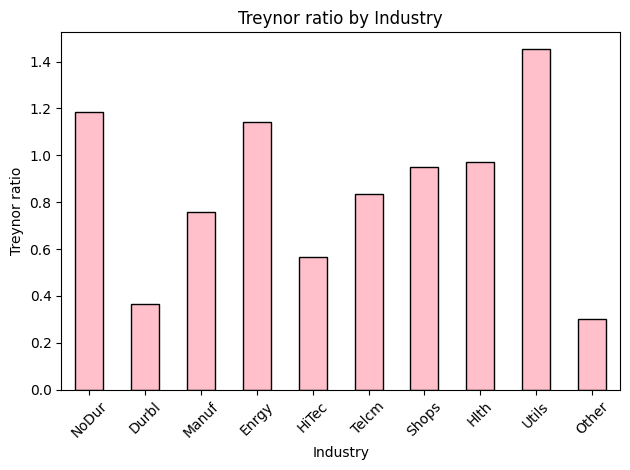

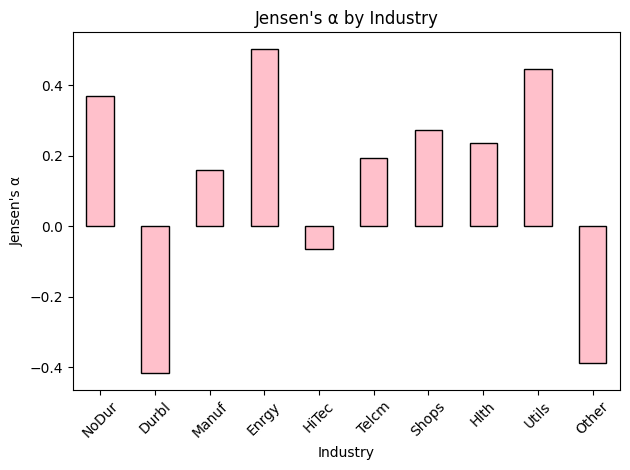

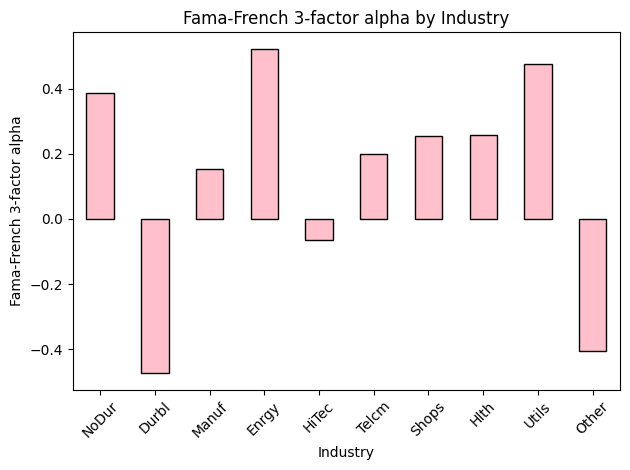

In [14]:
performance_metrics = ["Sharpe ratio", "Sortino ratio", "Treynor ratio", "Jensen's α", "Fama-French 3-factor alpha"]


plt.figure(figsize=(10, 6))

for metric in performance_metrics:
    plt.figure()
    res[metric].plot(kind='bar', color='pink', edgecolor='black')
    plt.title(f'{metric} by Industry')
    plt.xlabel('Industry')
    plt.ylabel(metric)
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

### Explanation

##### The Sharpe ratio helps investors assess the return per unit of total risk. The pricing implication is that returns in proportion to risk may be appropriately priced.
##### The Sortino ratio focuses on downside risk, measuring performance in negative risk situations. The pricing implication is that assets with well-controlled downside risk may be appropriately priced.
##### The Treynor ratio evaluates the risk-return for each unit of market risk. The pricing implication is that assets providing sufficient compensation for market risk will likely be priced appropriately.